# Final Project 4 / Clustering / Credit Card Data
Nama : Wilda Amrul Munafiah

Program : Python for Data Science

Kode Peserta : PYTN-KS16-021

# A. Perkenalan
### Project Overview
Dataset dapat diakses melalui link berikut https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

Data ini berisi transaksi pengguna kartu kredit sebanyak 9000 orang selama 6 bulan. Data
ini memiliki 18 atribut.

### Attribute Information:
1. CUSTID - Identification of Credit Card holder (Categorical)
2. BALANCE - Balance amount left in their account to make purchases (
3. BALANCEFREQUENCY - How frequently the Balance is updated, score between 0
and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES - Amount of purchases made from account
5. ONEOFFPURCHASES - Maximum purchase amount done in one-go
6. INSTALLMENTSPURCHASES - Amount of purchase done in installment
7. CASHADVANCE - Cash in advance given by the user
8. PURCHASESFREQUENCY - How frequently the Purchases are being made, score
between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. ONEOFFPURCHASESFREQUENCY - How frequently Purchases are happening in
one-go (1 = frequently purchased, 0 = not frequently purchased)
10. PURCHASESINSTALLMENTSFREQUENCY - How frequently purchases in
installments are being done (1 = frequently done, 0 = not frequently done)
11. CASHADVANCEFREQUENCY - How frequently the cash in advance being paid
12. CASHADVANCETRX - Number of Transactions made with "Cash in Advance"
13. PURCHASESTRX - Number of purchase transactions made
14. CREDITLIMIT - Limit of Credit Card for user
15. PAYMENTS - Amount of Payment done by user
16. MINIMUM_PAYMENTS - Minimum amount of payments made by user
17. PRCFULLPAYMENT - Percent of full payment paid by user
18. TENURE - Tenure of credit card service for user

### Objektif
Final Project 4 ini dibuat guna mengevaluasi konsep Clustering sebagai berikut:

- Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn
- Mampu mempersiapkan data untuk digunakan dalam Clustering
- Mampu mengimplementasikan Clustering pada data yang diberikan


# B. Import library

Mengumpulkan seluruh library yang dibutuhkan untuk penyelesaian project

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#Library for Hierarchical Clustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Librarry for K Means Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings; warnings.filterwarnings("ignore")

# C. Loading Data
 Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan explorasi data secara sederhana.

In [2]:
df=pd.read_csv('/content/CC_GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   float64
 11  PURCHASES_TRX                     8950 non-null   float64
 12  CREDIT

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


Terlihat dalam Dataset
- Nilai rata-rata dan nilai maximum pada kolom Balance berturut-turut adalah 1564 dan 19403
- Nilai rata-rata dan nilai maximum pada kolom BALANCE_FREQUENCY berturut-turut adalah 0,87 dan 1
- Nilai rata-rata dan nilai maximum pada kolom Purchases berturut-turut adalah 1003 dan 49039

In [45]:
df.describe(include='float')

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [46]:
# Melihat banyaknya unique values pada masing-masing atribut
for col in df.columns:
    print(col,':', df[col].nunique())

BALANCE : 8871
BALANCE_FREQUENCY : 43
PURCHASES : 6203
ONEOFF_PURCHASES : 4014
INSTALLMENTS_PURCHASES : 4452
CASH_ADVANCE : 4323
PURCHASES_FREQUENCY : 47
ONEOFF_PURCHASES_FREQUENCY : 47
PURCHASES_INSTALLMENTS_FREQUENCY : 47
CASH_ADVANCE_FREQUENCY : 54
CASH_ADVANCE_TRX : 65
PURCHASES_TRX : 173
CREDIT_LIMIT : 206
PAYMENTS : 8711
MINIMUM_PAYMENTS : 8637
PRC_FULL_PAYMENT : 47
TENURE : 7
Cluster KM : 2


In [44]:
df.shape

(8950, 18)

# D. Data Cleaning

Bagian ini berisi proses penyiapan data berupa data cleaning sebelum dilakukan explorasi data lebih lanjut. Proses cleaning dapat berupa memberi nama baru untuk setiap kolom, mengisi missing values, menghapus kolom yang tidak dipakai, dan lain sebagainya

In [3]:
# Mengecek missing value pada dataframe
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [4]:
# Mengecek duplikasi data pada dataframe
df.duplicated().sum()

0

In [5]:
#handling missing value pada dataframe
df.drop('MINIMUM_PAYMENTS', axis=1)
df.dropna(axis=0)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [6]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

# E. Data Eksplorasi

Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya

In [7]:
#Mengelompokkan Data Kategorikal dan Data Numerikal
num_fit = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY','CREDIT_LIMIT', 'PAYMENTS','MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']
cat_fit= ['CUST_ID','CASH_ADVANCE_TRX', 'PURCHASES_TRX','CUST_ID']

In [8]:
# Melihat nilai pada masing-masing atribut pada Dataframe
for col in df.columns:
    print(col, ': ')
    print(df[col].value_counts())
    print('\n','#'*60,'\n')

CUST_ID : 
C10001    1
C16135    1
C16129    1
C16130    1
C16131    1
         ..
C13065    1
C13064    1
C13063    1
C13062    1
C19190    1
Name: CUST_ID, Length: 8950, dtype: int64

 ############################################################ 

BALANCE : 
0.000000       80
40.900749       1
1213.551338     1
1253.188317     1
5058.299635     1
               ..
8791.161142     1
2320.402196     1
7215.745096     1
1013.233120     1
372.708075      1
Name: BALANCE, Length: 8871, dtype: int64

 ############################################################ 

BALANCE_FREQUENCY : 
1.000000    6211
0.909091     410
0.818182     278
0.727273     223
0.545455     219
0.636364     209
0.454545     172
0.363636     170
0.272727     151
0.181818     146
0.000000      80
0.090909      67
0.833333      60
0.875000      57
0.900000      55
0.888889      53
0.857143      51
0.500000      40
0.666667      37
0.333333      22
0.777778      22
0.800000      20
0.571429      19
0.750000      17
0.714

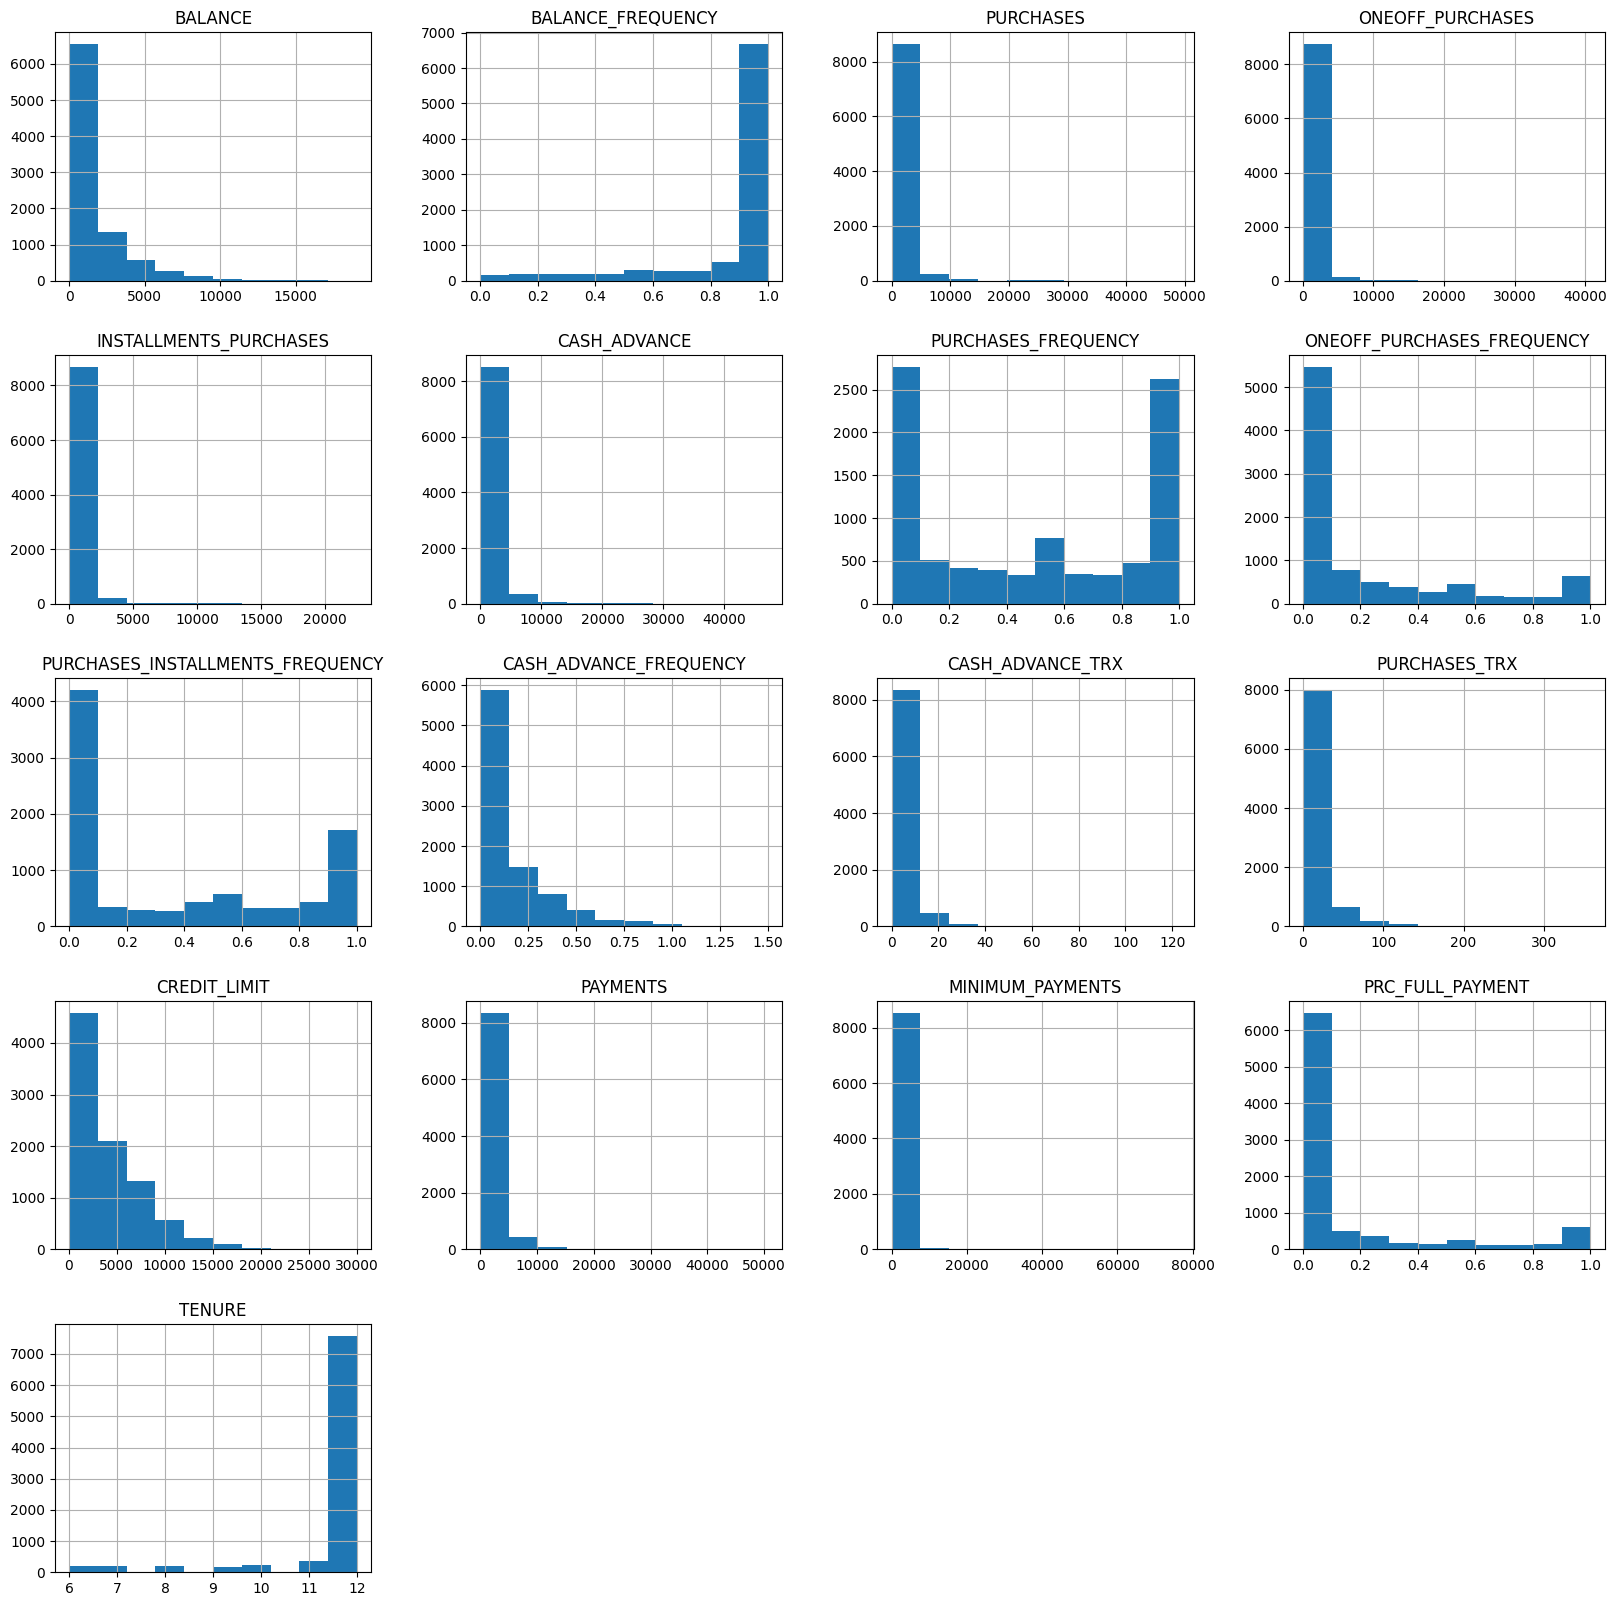

In [9]:
# let's do some data visualization
# let's check the distribution of the data
df.hist(figsize=(20,20))
plt.show()

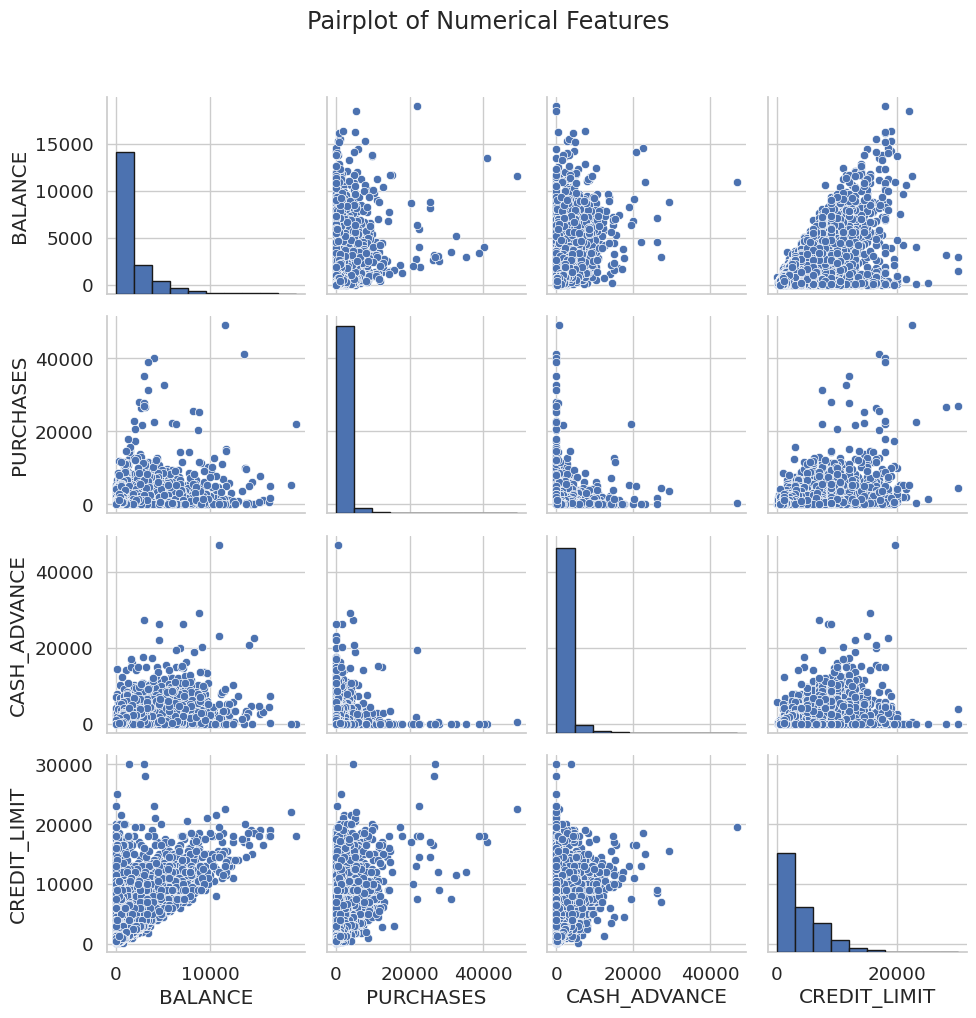

In [10]:
selected_columns = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT']
data_subset = df[selected_columns]

sns.set(style='whitegrid', font_scale=1.2)

color_palette = sns.color_palette("Set2")
pairplot = sns.pairplot(data_subset)

pairplot.fig.suptitle('Pairplot of Numerical Features', y=1.02)
plt.tight_layout()

pairplot.map_diag(plt.hist, edgecolor='k')

plt.show()

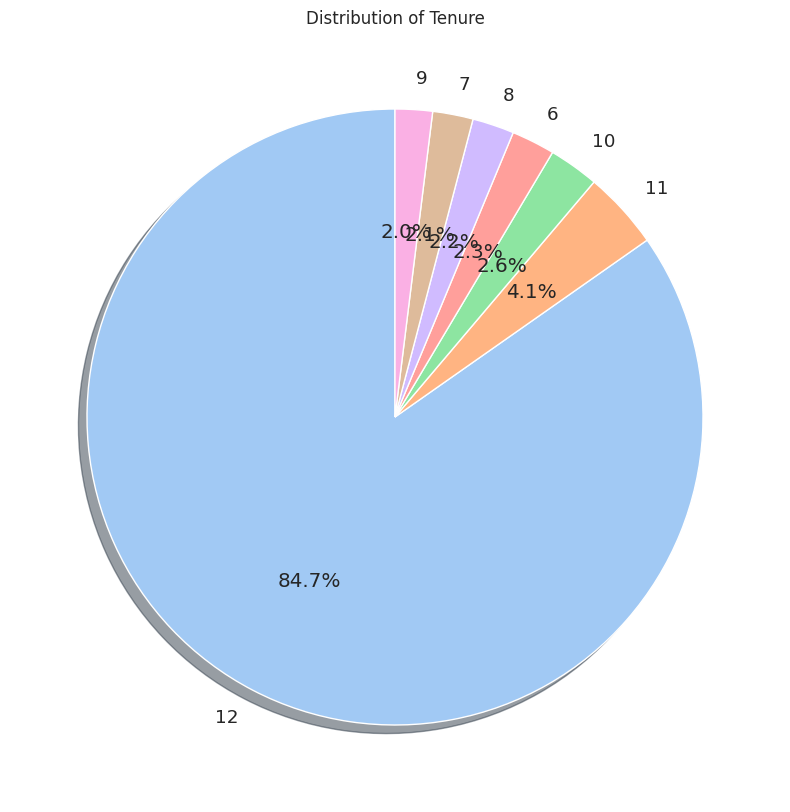

In [11]:
tenure_counts = df['TENURE'].value_counts()

colors = sns.color_palette('pastel')[0:len(tenure_counts)]

plt.figure(figsize=(10, 10))
plt.pie(tenure_counts, labels=tenure_counts.index, autopct='%1.1f%%', colors=colors, shadow=True, startangle=90)
plt.title('Distribution of Tenure', fontsize=12)

plt.setp(plt.gca().get_xticklabels(), fontsize=5)
plt.setp(plt.gca().get_yticklabels(), fontsize=5)

plt.show()

<Axes: >

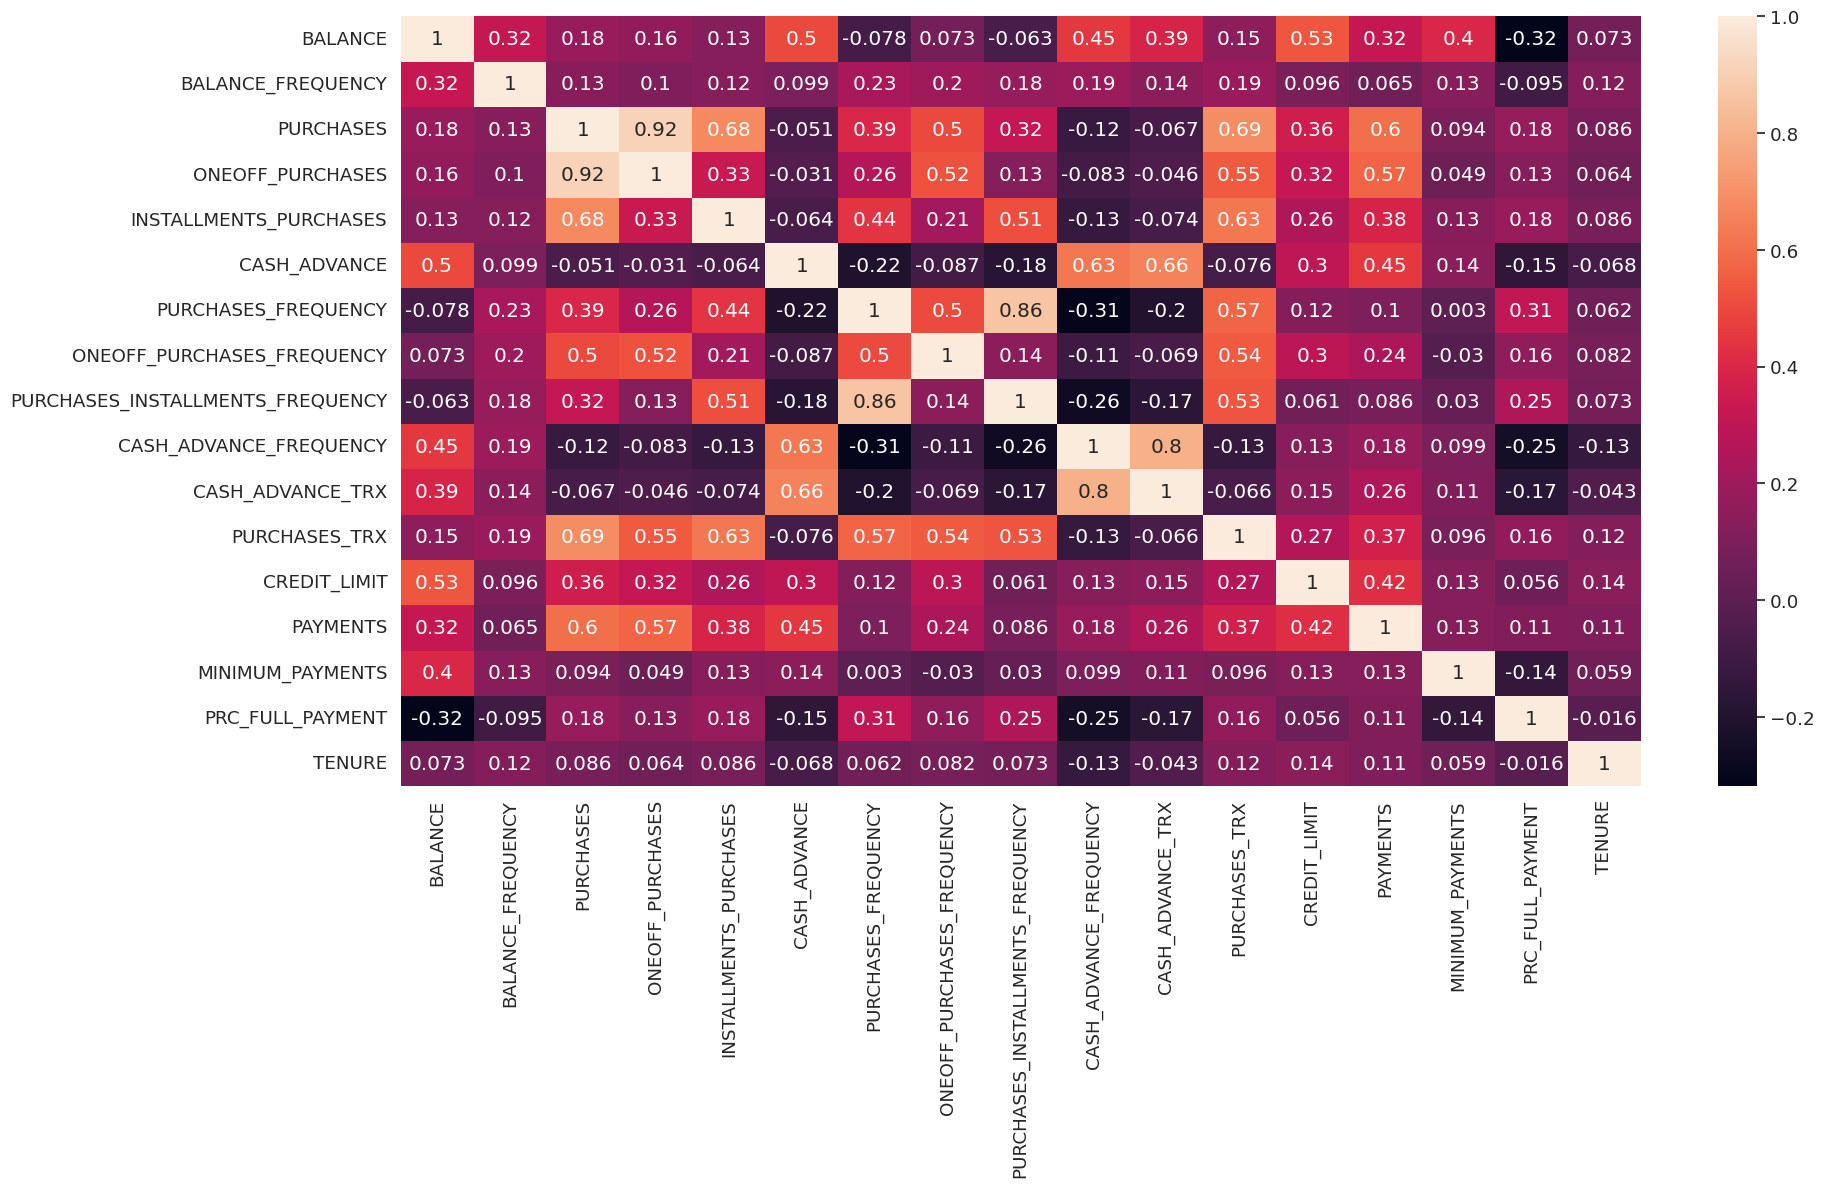

In [12]:
#Matrice de Corrélation
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True)

# F. Data Preprocessing

In [13]:
df_label = df['CUST_ID']
df.drop('CUST_ID', axis = 1 , inplace=True)

In [14]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import AgglomerativeClustering

In [15]:
# Imputation
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [16]:
from sklearn.preprocessing import StandardScaler,normalize
standardizer = StandardScaler()
standardizer.fit(df)
std_X = standardizer.transform(df)
std_df = pd.DataFrame(std_X, columns=df.columns)
std_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068


In [17]:
norm=normalize(std_df)
df_norm=pd.DataFrame(norm)
df_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.311938,-0.106297,-0.181072,-0.152108,-0.148760,-0.198921,-0.343687,-0.289212,-0.301422,-0.287801,-0.202878,-0.217905,-0.409290,-0.225425,-1.325192e-01,-0.223964,0.153704
1,0.219925,0.037539,-0.131222,-0.099749,-0.127037,0.728166,-0.341434,-0.189660,-0.256265,0.160401,0.030761,-0.165384,0.192448,0.228779,2.495877e-02,0.065457,0.100796
2,0.126682,0.146783,-0.030504,0.030850,-0.128790,-0.132249,0.359771,0.757440,-0.259802,-0.191339,-0.134880,-0.030888,0.234039,-0.108739,-2.880315e-02,-0.148899,0.102187
3,0.020589,-0.426439,0.097309,0.229034,-0.190618,-0.154587,-0.425253,-0.167447,-0.384524,-0.108570,-0.138184,-0.231288,0.346393,-0.251048,2.045620e-17,-0.220379,0.151244
4,-0.151595,0.218909,-0.195238,-0.146744,-0.192075,-0.197234,-0.428504,-0.168727,-0.387463,-0.285359,-0.201157,-0.233056,-0.382591,-0.153959,-1.123064e-01,-0.222064,0.152400


# Pendefinisian Model

## K-Means Clustering

In [18]:
# Elbow Method
scores = []
for k in range(2,15):
    km = KMeans(n_clusters=k,random_state=123)
    km = km.fit(df_norm)
    scores.append(km.inertia_)

In [19]:
dfk = pd.DataFrame({'Cluster':range(2,15), 'Score':scores})
dfk.head()

,Cluster,Score
0,2,6712.707851
1,3,5827.136229
2,4,5145.759022
3,5,4521.798339
4,6,4176.846852


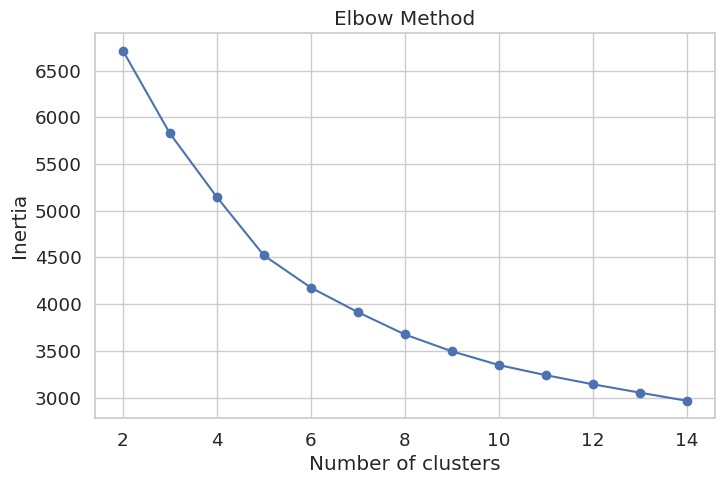

In [20]:
# Visualisasi Model
plt.figure(figsize=(8,5))
plt.plot(dfk['Cluster'], dfk['Score'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

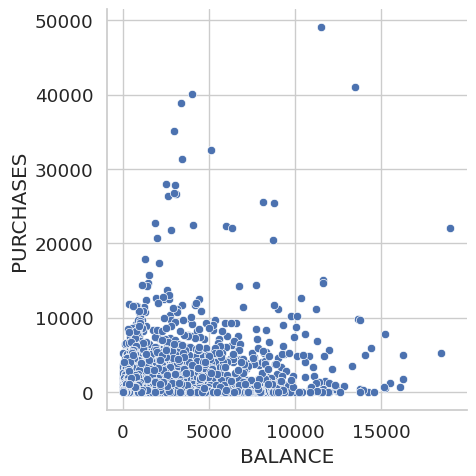

In [21]:
sns.relplot(x='BALANCE', y='PURCHASES', data=df)

In [22]:
modelKM = KMeans(n_clusters=2, random_state=42)
modelKM.fit(df)
df['Cluster KM'] = modelKM.predict(df)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster KM
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,864.206542,0.000000,12.0,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,0


In [23]:
# k-means clustering
model = KMeans(4)
model.fit(df)
# get the unique labels
np.unique(model.labels_)

array([0, 1, 2, 3], dtype=int32)

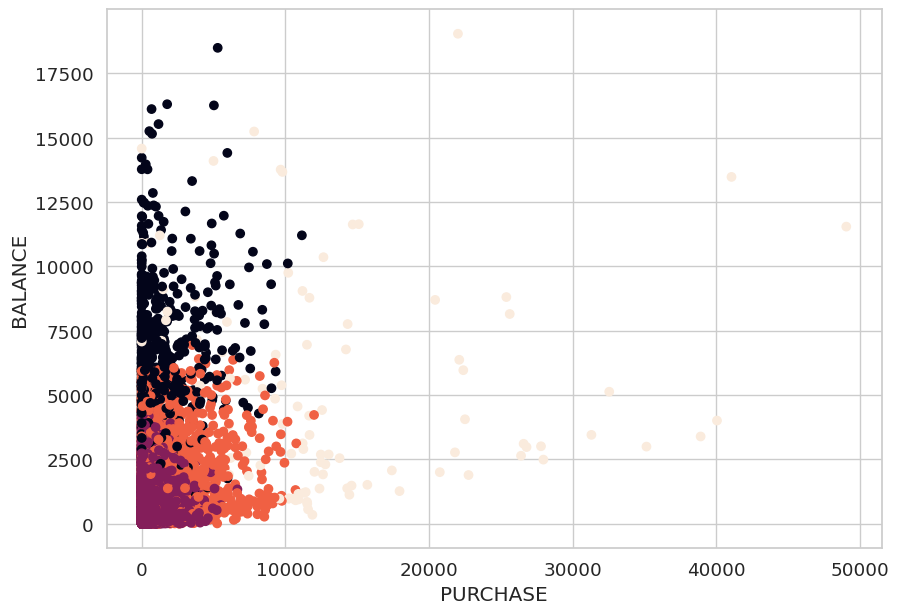

In [24]:
# let's do a scatter plot to see the clusters
plt.figure(figsize=(10,7))
plt.scatter(df['PURCHASES'], df['BALANCE'], c=model.labels_)
plt.xlabel('PURCHASE')
plt.ylabel('BALANCE')
plt.show()

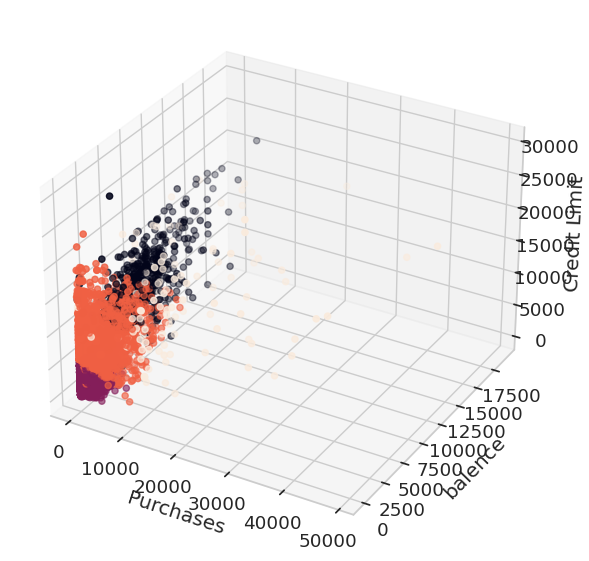

In [25]:
# 3D plot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['PURCHASES'], df['BALANCE'], df['CREDIT_LIMIT'], c=model.labels_)
ax.set_xlabel('Purchases')
ax.set_ylabel('balence')
ax.set_zlabel('Credit Limit')
plt.show()

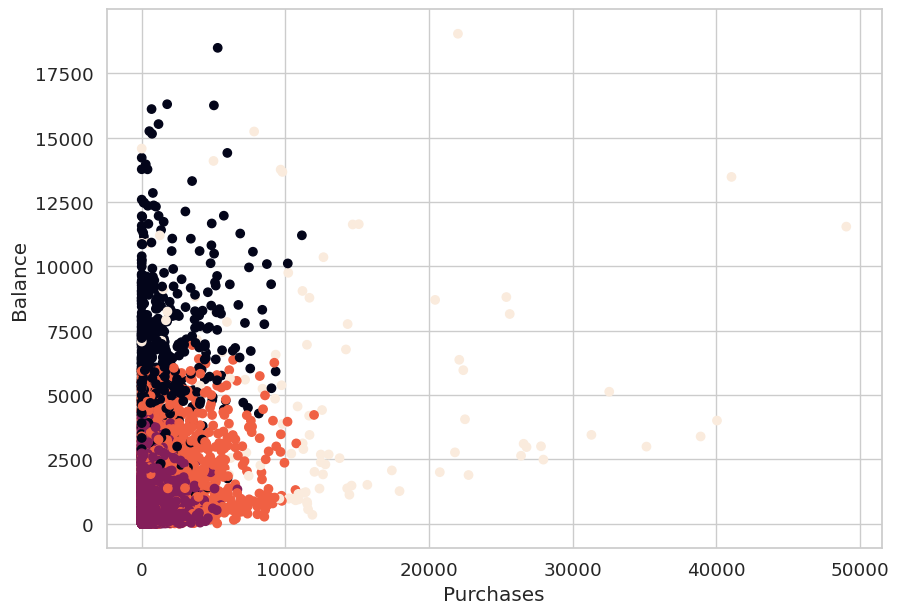

In [26]:
# lets plot the balance and purchases for both of the models
# let's do a scatter plot to see the clusters
plt.figure(figsize=(10,7))
plt.scatter(df['PURCHASES'], df['BALANCE'], c=model.labels_)
plt.xlabel('Purchases')
plt.ylabel('Balance')
plt.show()

# Hierarchial Clustering

In [28]:
# Standardize data
scaler = StandardScaler()
scaled = scaler.fit_transform(df)

# Statistics of scaled data
scaled_df = pd.DataFrame(scaled, columns=df.columns)
scaled_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster KM
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068,-0.522951
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068,1.912226
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068,-0.522951
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551,0.36068,-0.522951
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068,-0.522951


In [29]:
hier_cluster = linkage(scaled_df, method='ward')

In [36]:
#hierarchical clustering
hir = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hir.fit(df)
# get the unique labels
np.unique(hir.labels_)

array([0, 1, 2, 3])

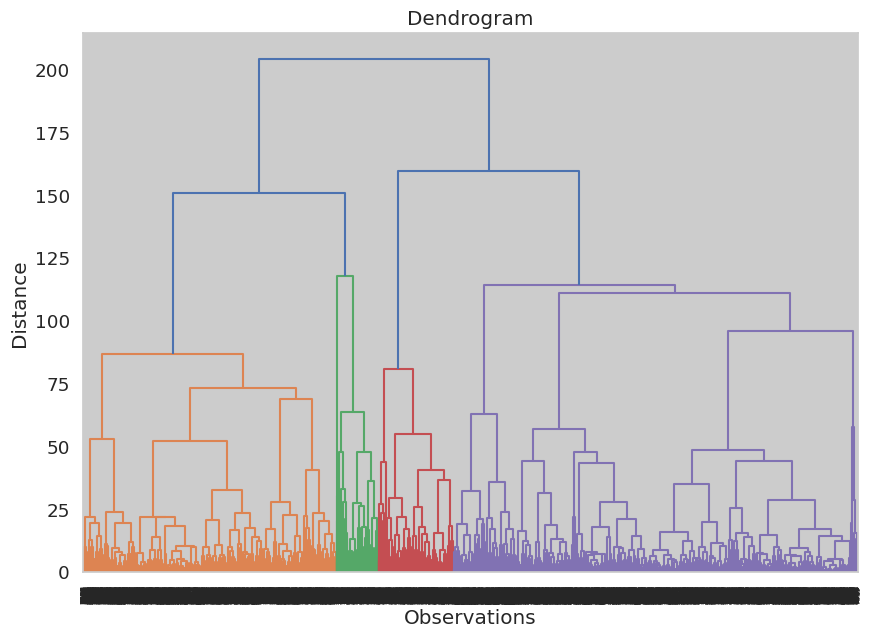

In [30]:
# dendrogram
plt.figure(figsize=(10,7))
plt.title('Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram = sch.dendrogram(sch.linkage(scaled_df, method='ward'))
plt.show()

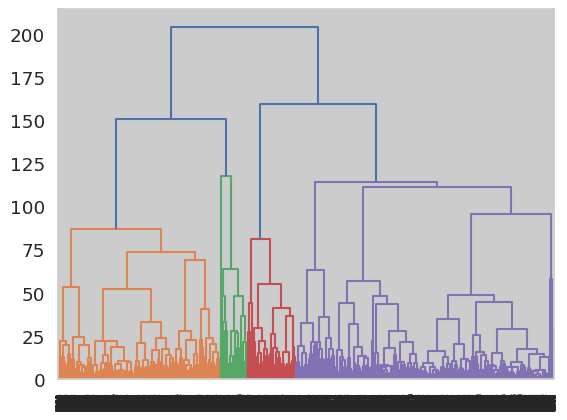

In [27]:
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler

# Select the relevant features for clustering
features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
            'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
            'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX',
            'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS',
            'PRC_FULL_PAYMENT', 'TENURE']

# Perform feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

# Perform hierarchical clustering
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method='ward'))

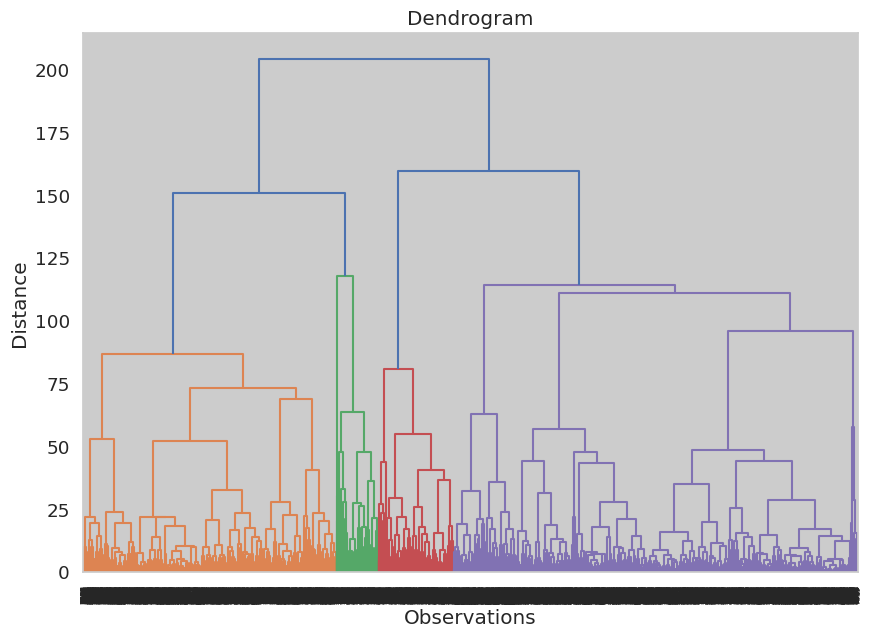

In [31]:
# dendrogram
plt.figure(figsize=(10,7))
plt.title('Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method='ward'))
plt.show()

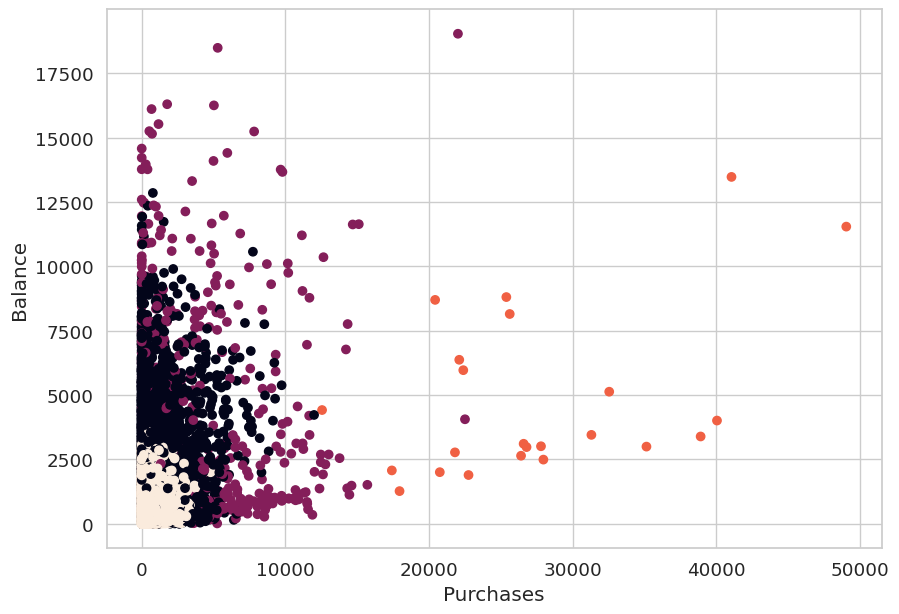

In [37]:
# now for the hirarchical model
# let's do a scatter plot to see the clusters
plt.figure(figsize=(10,7))
plt.scatter(df['PURCHASES'], df['BALANCE'], c=hir.labels_)
plt.xlabel('Purchases')
plt.ylabel('Balance')
plt.show()

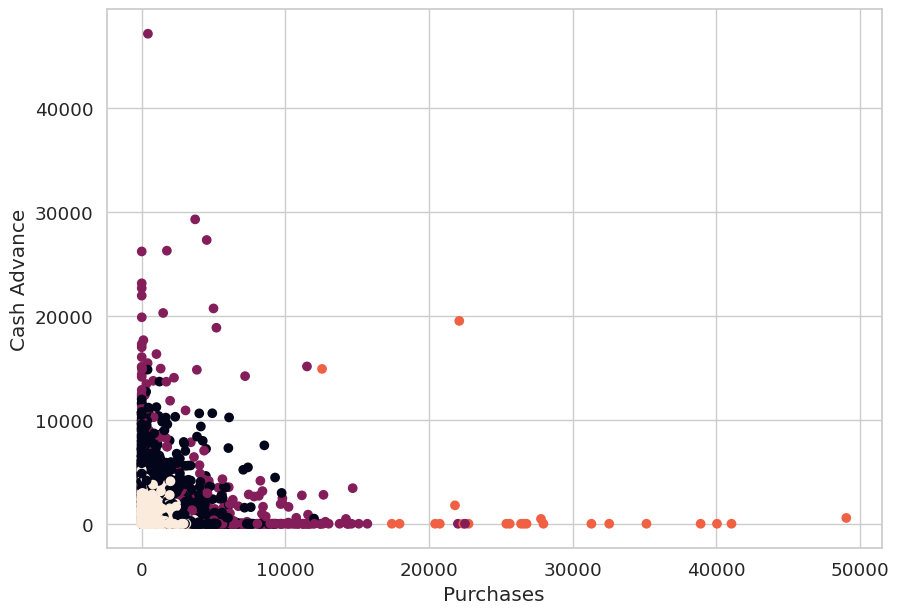

In [38]:
# let's do a scatter plot to see the clusters
plt.figure(figsize=(10,7))
plt.scatter(df['PURCHASES'], df['CASH_ADVANCE'], c=hir.labels_)
plt.xlabel('Purchases')
plt.ylabel('Cash Advance')
plt.show()

# H. Pelatihan Model

In [35]:
# k-means clustering
model = KMeans(4)
model.fit(df)
# get the unique labels
np.unique(model.labels_)

array([0, 1, 2, 3], dtype=int32)

In [39]:
# Hierarchical clustering
hir = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hir.fit(df)
# get the unique labels
np.unique(hir.labels_)

array([0, 1, 2, 3])

# I. Evaluasi Model

In [40]:
# Bonus: Search for another validation metric

# 1- Silhouette score for hierarchical clustering
silhouette_avg = silhouette_score(df, hir.labels_)
print(f"Silhouette score for hierarchical clustering: {silhouette_avg}")

# 2- Silhouette score for k-means clustering
silhouette_avg = silhouette_score(df, model.labels_)
print(f"Silhouette score for k-means clustering: {silhouette_avg}")

Silhouette score for hierarchical clustering: 0.3814898026551428
Silhouette score for k-means clustering: 0.4657118805096783


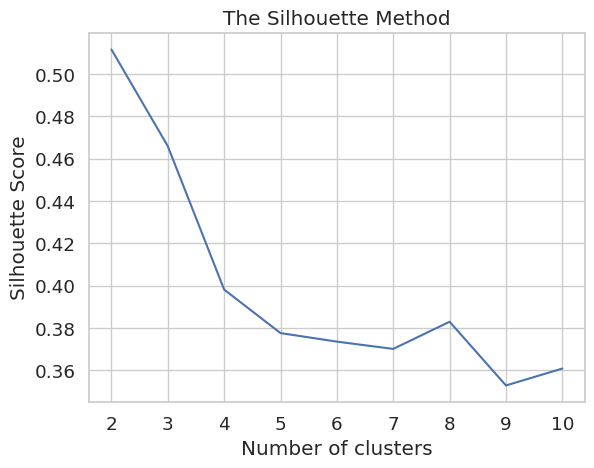

In [41]:
# get the best number of clusters for k-means clustering and plot the silhouette score for different number of clusters
silhouette_scores = []
for i in range(2, 11):
    model = KMeans(i)
    model.fit(df)
    silhouette_scores.append(silhouette_score(df, model.labels_))
plt.plot(range(2, 11), silhouette_scores)
plt.title('The Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# J. Kesimpulan

Skor Silhouette adalah metrik yang digunakan untuk mengevaluasi kualitas hasil pengelompokan. Ini memberikan ukuran seberapa cocok setiap titik data dalam cluster yang ditugaskan, serta pemisahan antara cluster yang berbeda. Skornya berkisar antara -1 hingga 1, dimana:

- Skor yang mendekati +1 menunjukkan bahwa titik data cocok dengan klasternya sendiri dan kurang cocok dengan klaster tetangganya, sehingga menunjukkan hasil pengelompokan yang baik.
- Skor yang mendekati 0 menunjukkan bahwa titik data berada pada atau sangat dekat dengan batas keputusan antar klaster yang bertetangga, yang menunjukkan potensi tumpang tindih atau ambiguitas dalam pengelompokan.
- Skor yang mendekati -1 menunjukkan bahwa titik data ditugaskan ke cluster yang salah dan akan lebih baik ditempatkan di cluster yang berbeda.
- Skor Silhouette dihitung untuk setiap titik data dalam kumpulan data dan kemudian dirata-ratakan untuk mendapatkan skor Silhouette keseluruhan untuk solusi pengelompokan.
Ini adalah cara yang mudah untuk menilai hasil pengelompokan secara kuantitatif, terutama ketika label kebenaran dasar tidak tersedia.

Berikut ikhtisar cara penghitungan skor Silhouette:

1. Untuk setiap titik data, hitung jarak rata-rata (a) ke semua titik lain dalam cluster yang sama. 2. Untuk setiap titik data, hitung jarak rata-rata (b) ke semua titik di cluster tetangga terdekat (yaitu cluster dengan jarak rata-rata terkecil).
3. Hitung koefisien Silhouette (s) untuk setiap titik data menggunakan
rumus:

    s = (b - a) / max(a, b)

4. Hitung rata-rata skor Silhouette dengan mengambil rata-rata koefisien Silhouette untuk semua titik data.